In [2]:
#CHURN ANALYSIS# 

In [3]:
##Churn analysis;##
#1-)What is the renewal rate of the product?
#2-)What could be the main barriers for not renewing? 
#What will be your suggestion for not to lose these customers?
#3-)Define the profile for the customers not renewed
#4-)Why did the customer renewed with us
#5-)Create a structured campaign for churn

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
os.chdir('C:/Users/User/Desktop/xxx/')
df = pd.read_excel('Churn_Analysis.xlsx', sheet_name='Sheet1')

In [7]:
df.head()

,RenewalResult,VehicleBrand,VehicleModelYear,VehiclePlateCityName,ExsistingPolicyGrossPremium,New Price
0,Not Renewed,RENAULT (OYAK),2009,İSTANBUL,1087.064,1192.389
1,Not Renewed,RENAULT (OYAK),2011,İSTANBUL,603.900,751.245
2,Not Renewed,MERCEDES,2009,İSTANBUL,1514.986,1710.786
3,Not Renewed,HYUNDAI,2005,İZMİR,682.099,942.865
4,Not Renewed,TOFAS-FIAT,2013,İSTANBUL,1413.456,1382.150


In [8]:
#tek değişkenli analizlere bakalım
df[['RenewalResult']].groupby(['RenewalResult']).size()
#yenileme sayıları aşağıdaki gibi

RenewalResult
Not Renewed    1041
Renewed        1754
dtype: int64

In [9]:
#1.Question
renewal_rate=(1754/2795)*100
print(renewal_rate)

62.75491949910554


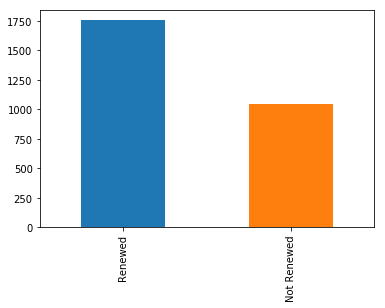

In [10]:
df['RenewalResult'].value_counts().plot(kind='bar')
#yenileme yapanlar daha fazla bir kitle

In [11]:
df[['VehicleBrand']].groupby(['VehicleBrand']).size().sort_values(ascending=False)
#en çok araba modelimiz renault,volkswagen,opel,ford dan oluşuyor.

VehicleBrand
RENAULT (OYAK)                382
VOLKSWAGEN                    335
OPEL                          301
FORD                          255
TOYOTA                        243
TOFAS-FIAT                    239
HYUNDAI                       201
HONDA                         120
RENAULT                       102
FIAT                           61
NISSAN                         60
CITROEN                        60
SEAT                           59
SKODA                          54
DACIA                          53
CHEVROLET                      52
KIA                            48
PEUGEOT                        45
BMW                            23
VOLVO                          22
MERCEDES                       20
MAZDA                          14
SUZUKI                         12
MITSUBISHI                     11
AUDI                            6
SUBARU                          5
LANCIA                          4
DAIHATSU                        3
LADA                            1
M

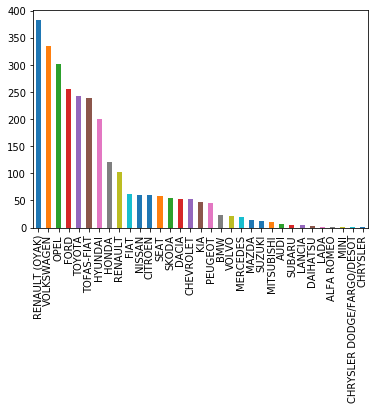

In [12]:
#Ürün gamımız da araç modeli olarak renault,volkswagen,opel
#ve ford başı çekmektedir
df['VehicleBrand'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [13]:
df[['VehiclePlateCityName']].groupby(['VehiclePlateCityName']).size().sort_values(ascending=False)
#en çok müşterimiz istanbuldan

VehiclePlateCityName
İSTANBUL           1362
ANKARA              362
İZMİR               133
BURSA               133
ANTALYA              76
BALIKESİR            45
ADANA                41
ESKİŞEHİR            40
MERSİN               38
TEKIRDAG             35
KONYA                33
KOCAELİ              31
MANİSA               31
AYDIN                30
MUĞLA                26
DENİZLİ              24
KÜTAHYA              17
GAZİANTEP            17
K.MARAŞ              16
SAMSUN               16
EDİRNE               16
KARABÜK              15
ZONGULDAK            14
MALATYA              14
KAYSERİ              13
TOKAT                13
ÇANAKKALE            12
AFYON KARAHİSAR      12
TRABZON              12
KASTAMONU            12
HATAY                10
KIRKLARELİ           10
SAKARYA              10
ORDU                  9
YALOVA                8
SİNOP                 7
SIVAS                 7
AKSARAY               6
BOLU                  6
BURDUR                6
UŞAK               

In [14]:
df[['VehicleModelYear']].groupby(['VehicleModelYear']).size().sort_values(ascending=False)
#en çok 2015 yılı araba modellerini kaskolamışız

VehicleModelYear
2015    414
2013    410
2012    378
2011    365
2014    227
2016    176
2010    170
2009    147
2008    129
2007    101
2006    100
2004     70
2005     57
2017     18
2001     11
2000      7
2003      6
2002      4
1999      2
1998      1
2018      1
1997      1
dtype: int64

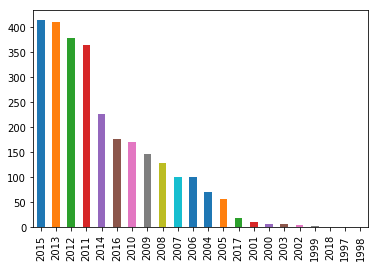

In [15]:
df['VehicleModelYear'].value_counts().plot(kind='bar')

In [16]:
df[['ExsistingPolicyGrossPremium']].describe()
#mevcut policelere bakarsak ortalamamız 930 lira civarında,500-3100 lira arasında değişim göstermekte.

,ExsistingPolicyGrossPremium
count,2795.000000
mean,930.321639
std,343.109501
min,506.737000
25%,686.323000
50%,811.492000
75%,1105.203000
max,3115.607000


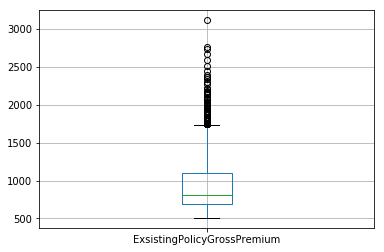

In [17]:
df.boxplot('ExsistingPolicyGrossPremium')

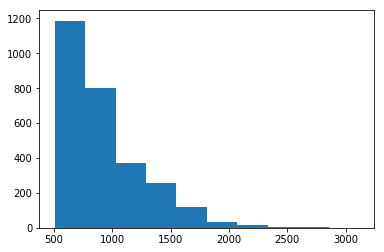

In [18]:
#mevcut police ücretlerinin normal dağılıp dağılmadınna bakalım
from matplotlib import pyplot
pyplot.hist(df['ExsistingPolicyGrossPremium'])
pyplot.show()

In [19]:
#right skewed yani sağa çarpık bir dağılım sözkonusu
#normal dağılıma uygunluk için test yapalım
# Shapiro-Wilk Test
from numpy.random import seed
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(df['ExsistingPolicyGrossPremium'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
#Poliçe ücretleri medyanı yaklaşık 800 lira civarıdır
#sağa çarpık normal olmayan bir dağılıma sahiptir
#burdan çok yüksek ücretli ürünler satmadığımız sonucunu çıkarabiliriz

Statistics=0.865, p=0.000
Sample does not look Gaussian (reject H0)


In [20]:
#mevcut police ücretlerimiz normal dağılıma uymuyor.
#normal dağılıma uymadığı varsayımı altında mevcut police ücretlerinin araba modelleri ile arasında bir ilişki varmı diye
#test yapalım
# Kruskal-Wallis H-test
from numpy.random import seed
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# compare samples
stat, p = kruskal(df['ExsistingPolicyGrossPremium'], list(df['VehicleBrand']))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=4196.018, p=0.000
Different distributions (reject H0)


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [21]:
#mevcut poliçe ücretlerinin normal dağılmadığı varsayımı altında
#araba modellerine göre değişkenlik gösterip göstermediğine bakmak
#için istatistiksel test uıygulanmış ve araç modellerine göre
#uygulanan fiyatların farklı olduğu sonucuna ulaşılmıştır.


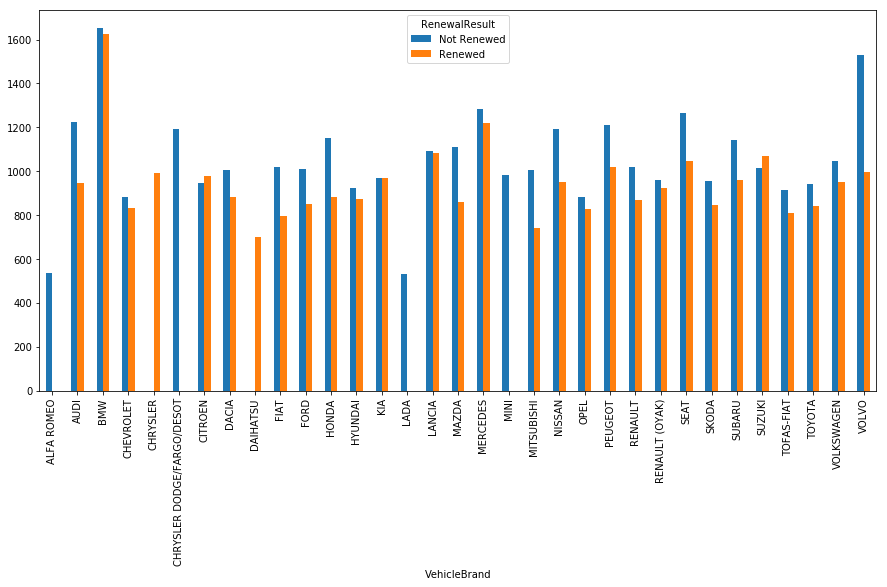

In [22]:
#araba modeline ve yenileme durumlarına göre ortalama uygulanan mevcut fiyatlara bakalım
#yüksek fiyatlar ödeyen müşteri iptal ediyor gibi gözüküyor.
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['VehicleBrand','RenewalResult']).mean()['ExsistingPolicyGrossPremium'].unstack().plot(kind='bar',ax=ax)

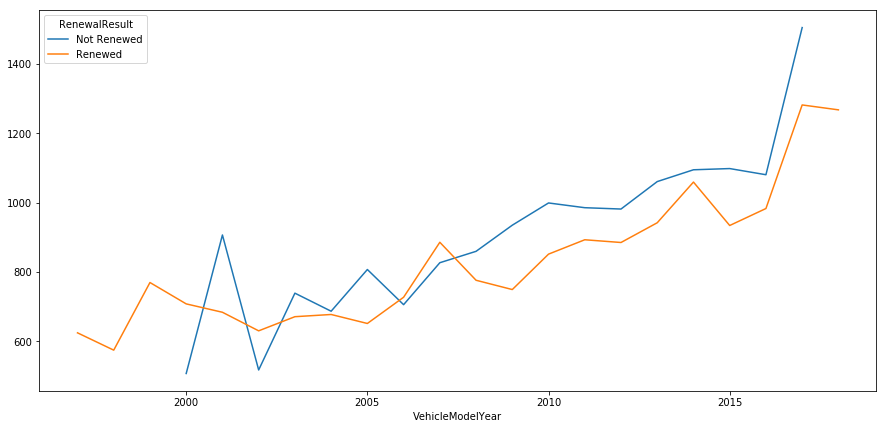

In [23]:
#araba model yılına ve yenileme durumuna göre baktığımızda 2015 yılı ve sonrası araba modelleri için yüksek fiyat uygulamasıyla 
#birlikte iptallerin arttığı görülüyor.
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['VehicleModelYear','RenewalResult']).mean()['ExsistingPolicyGrossPremium'].unstack().plot(ax=ax)

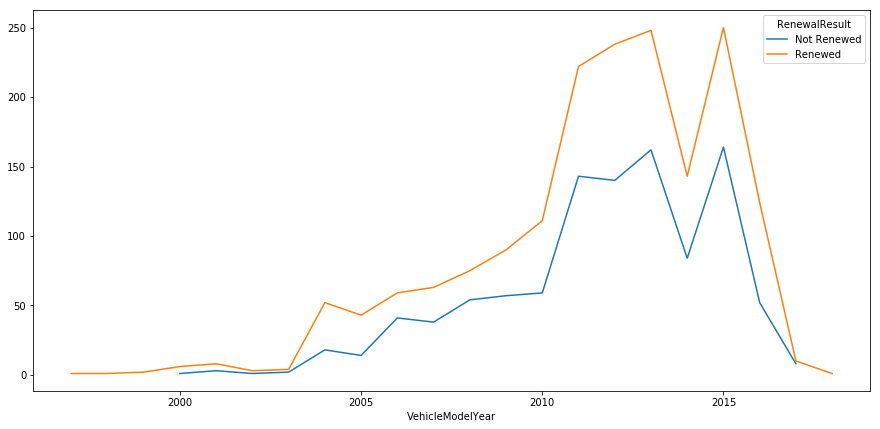

In [24]:
#araba model yılına ve yenileme durumu sayılarına göre baktığımızda 2015 yılı ve sonrası araba modellerinde yüksek oranda 
#müşteri iptalivar
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['VehicleModelYear','RenewalResult']).size().unstack().plot(ax=ax)

In [25]:
#fiyat yükseliği her iki grafikte de churn u etkiliyor diye gözüküyor.yaşı genç araba sahiplerinin hızla churn ettikleri görülüyor.
#istatistiksel test ile aralarında anlamlı bir fark olup olmadığına bakalım.

t1=df[['RenewalResult','ExsistingPolicyGrossPremium']]

tnr=t1[t1['RenewalResult'] == 'Not Renewed']['ExsistingPolicyGrossPremium']
tr=t1[t1['RenewalResult'] == 'Renewed']['ExsistingPolicyGrossPremium']

from scipy.stats import ttest_ind

stat, p = ttest_ind(tnr, tr)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

#istatistiksel teste göre mevcut police fiyatları arasındaki farklılık müşteri iptalini etkiliyor.
#iptal yapan ve yapmayan kitlenin dağılımları farklı

Statistics=8.034, p=0.000
Different distributions (reject H0)


In [26]:
#yenileme durumlarına göre ortalama police fiyatları
df.groupby(['RenewalResult']).mean()['ExsistingPolicyGrossPremium']

RenewalResult
Not Renewed    997.245682
Renewed        890.602181
Name: ExsistingPolicyGrossPremium, dtype: float64

In [27]:
#churn edenler ile etmeyenler arasındaki mevcut poliçe
#ücretleri arasında fark olup olmadığına dair istatistiksel
#test yaptığımızda iki grubun ücretleri arasında anlamlı bir
#fark görünüyor.
#sözleşme yenilemeyenler daha yüksek ücret ödeyen kitledir


In [28]:
#sozlesme yenileyenler ile yenilemeyenlerin mevcut police ücretleri bazında istatiski özeti
df[['ExsistingPolicyGrossPremium','RenewalResult']].groupby(['RenewalResult']).describe()
#yenileme yapmayanlar ortalama 100 lira daha fazla ödeyen bir kilte olarak karşımıza çıkıyor.

ExsistingPolicyGrossPremium                                   \
                                    count        mean         std      min   
RenewalResult                                                                
Not Renewed                        1041.0  997.245682  376.120421  506.737   
Renewed                            1754.0  890.602181  315.384528  516.241   

                                                        
                    25%      50%         75%       max  
RenewalResult                                           
Not Renewed    710.8750  875.754  1222.51800  2766.742  
Renewed        675.2295  785.433  1015.35225  3115.607

In [29]:
#acaba farklılık model yılından mı kaynaklanmaktadır ? Sonuçta eski arabaların police ücretlerinin daha düşük olması beklenir
q1=pd.DataFrame(df[['VehicleModelYear','ExsistingPolicyGrossPremium','RenewalResult']].groupby(['RenewalResult','VehicleModelYear']).mean()['ExsistingPolicyGrossPremium'])
q2=q1.add_suffix('_Mean').reset_index()
q3=q2.drop(q2.index[[18,19,20,39]])

In [70]:
q3.head()

,RenewalResult,VehicleModelYear,ExsistingPolicyGrossPremium_Mean
0,Not Renewed,2000,506.737000
1,Not Renewed,2001,906.499000
2,Not Renewed,2002,516.945000
3,Not Renewed,2003,738.567500
4,Not Renewed,2004,686.464167


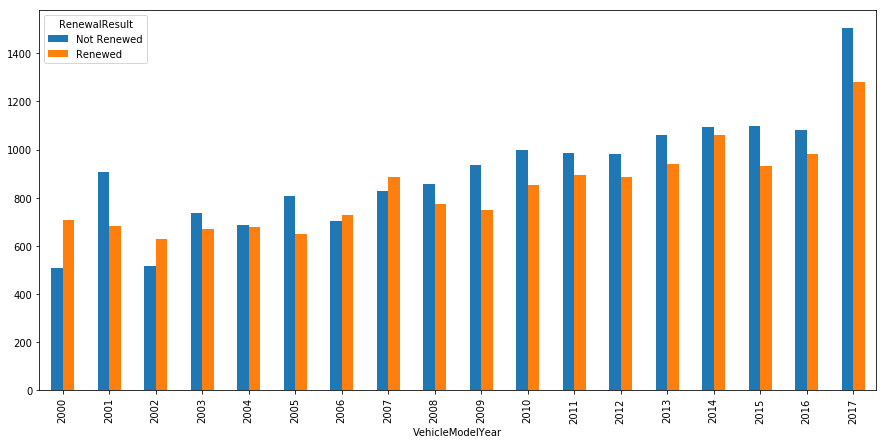

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
q3.groupby(['VehicleModelYear','RenewalResult']).mean()['ExsistingPolicyGrossPremium_Mean'].unstack().plot(kind='bar',ax=ax)

In [32]:
#model yılı olarak police ücretlerinde hep bir artış söz konusu,burda yine churn edenlerin police fiyatları daha çok çıkmış.
#neden ?
#model yılı bazında iptallerin iptal etmeyenlere göre ödedikleri farklı bulalım

In [36]:
yil=list(q3.iloc[:,1])
renewal=list(q3.iloc[:,0])
ExsistingPolicyGrossPremium_Mean=list(q3.iloc[:,2])
chng={}
chng=list(zip(zip(renewal,yil),ExsistingPolicyGrossPremium_Mean))
chng=dict(chng)

r_list=[]
for key in chng.items():
    r_list.append(key[0][0])

r_list=list(set(r_list))

y_list=[]
for key in chng.items():
    y_list.append(key[0][1])

y_list=list(set(y_list))

deg={}
for i in y_list:
    deg[i]=(chng[(r_list[0],i)]-chng[(r_list[1],i)])/chng[(r_list[1],i)]*100

In [37]:
from collections import OrderedDict
d_sorted_by_value = OrderedDict(sorted(deg.items(), key=lambda x: x[0],reverse=True))
d_sorted_by_value
#araç model yılları bazında iptal edenler etmeyenlere göre daha faza ücret ödemeektedir.

OrderedDict([(2017, 17.41881013071054),
             (2016, 9.920899754710549),
             (2015, 17.594229988610596),
             (2014, 3.350305175388446),
             (2013, 12.61534875591579),
             (2012, 10.911926755124957),
             (2011, 10.365406232464744),
             (2010, 17.347428373311715),
             (2009, 24.794686380862174),
             (2008, 10.763126504104958),
             (2007, -6.662427575195908),
             (2006, -2.9445548155481998),
             (2005, 23.917385526501295),
             (2004, 1.3922108057638185),
             (2003, 10.124734498396759),
             (2002, -17.926521868214408),
             (2001, 32.63775860230522),
             (2000, -28.389553862894452)])

In [38]:
#en çok iptal eden model yılları
s1=df[df['RenewalResult'] == 'Not Renewed'].groupby(['VehicleModelYear']).size().sort_values(ascending=False)
print(s1)

VehicleModelYear
2015    164
2013    162
2011    143
2012    140
2014     84
2010     59
2009     57
2008     54
2016     52
2006     41
2007     38
2004     18
2005     14
2017      8
2001      3
2003      2
2002      1
2000      1
dtype: int64


In [39]:
s1=dict(s1)
combined = {key:[deg[key], s1[key]] for key in deg}
c1 = OrderedDict(sorted(combined.items(), key=lambda x: x[1],reverse=True))
c1

OrderedDict([(2001, [32.63775860230522, 3]),
             (2009, [24.794686380862174, 57]),
             (2005, [23.917385526501295, 14]),
             (2015, [17.594229988610596, 164]),
             (2017, [17.41881013071054, 8]),
             (2010, [17.347428373311715, 59]),
             (2013, [12.61534875591579, 162]),
             (2012, [10.911926755124957, 140]),
             (2008, [10.763126504104958, 54]),
             (2011, [10.365406232464744, 143]),
             (2003, [10.124734498396759, 2]),
             (2016, [9.920899754710549, 52]),
             (2014, [3.350305175388446, 84]),
             (2004, [1.3922108057638185, 18]),
             (2006, [-2.9445548155481998, 41]),
             (2007, [-6.662427575195908, 38]),
             (2002, [-17.926521868214408, 1]),
             (2000, [-28.389553862894452, 1])])

In [40]:
x=pd.DataFrame(c1)
x.transpose().corr()
#araç model yıllarına göre iptal eden/etmeyen müşterilerin mevcut police ücret oranları ile model yılları bazındaki iptaller
#arasında %23 lük bir korelasyon çıkmıştır.

,0,1
0,1.000000,0.233584
1,0.233584,1.000000


In [41]:
#model yılları bazında çok anlamlı ipucu veren bir sonuçla karşılaşmadık.devam edelim.

In [42]:
#çok değişkenli incelemeye başlayalım
from scipy import stats
h1=df.groupby(['RenewalResult','VehicleBrand']).agg({'VehicleModelYear':lambda x:stats.mode(x)[0],'ExsistingPolicyGrossPremium':'mean','New Price':'mean','RenewalResult':'count'})
h2=h1.add_suffix('_Count').reset_index()
h2.columns = ['RenewalResult', 'VehicleBrand', 'Modest_Model_Year', 'Ort_Pol_Fiy', 'Ort_New_Price','RenewaL_Count']
h2['Ort_Fiyat_Degisim']=(h2['Ort_New_Price']-h2['Ort_Pol_Fiy'])/h2['Ort_Pol_Fiy']*100
h2.head()

#yenileme durumu ve araç modelleri bazında,en çok gözlenen model yılı,ortalama mevcut policçe fiyatı,
#yeni fiyat ortalaması,yenileme sayıları ve ortalama değişim miktarları hesaplanmıştır.

,RenewalResult,VehicleBrand,Most_Model_Year,Ort_Pol_Fiy,Ort_New_Price,RenewaL_Count,Ort_Fiyat_Degisim
0,Not Renewed,ALFA ROMEO,2006,536.833000,643.159000,1,19.806159
1,Not Renewed,AUDI,2011,1224.949000,1259.016000,1,2.781095
2,Not Renewed,BMW,2013,1652.200000,1795.406250,12,8.667610
3,Not Renewed,CHEVROLET,2012,884.183882,896.385471,17,1.379983
4,Not Renewed,CHRYSLER DODGE/FARGO/DESOT,2008,1191.597000,947.529000,1,-20.482428


In [43]:
#bu bağlamda churn gruplarının özelliklerine bakalım artık araç modelini hesaba kattık
import numpy as np
h2.groupby(['RenewalResult'],as_index=False).agg({'Ort_Pol_Fiy' :  [np.min,np.mean,np.max],'Ort_New_Price' : np.mean,'Ort_Fiyat_Degisim' : np.mean,'RenewaL_Count' : np.sum,'Most_Model_Year' : [np.min, np.max]})
#yenileme yapmayan kitlenin mevcut poliçe range i daha geniştir.ve ortalamada daha yüksek ücret ödemekte 
#aynı zamanda bu kitleye daha yüksek miktarda yeni ücret teklifi yapılmıştır.
#yenileme yapan kitle mevcut pozisyonunu korumuş hatta ufak bir indirim bile almıştır.aynı zamanda yenileme yapan kitlenin
#araç model yılı range i daha geniştir.eski model arabası olan müşteriler bizimle çalışıyor gibi gözüküyor.

RenewalResult Ort_Pol_Fiy                        Ort_New_Price  \
                       amin         mean      amax          mean   
0   Not Renewed  529.628000  1051.330467  1652.200   1110.926966   
1       Renewed  700.274667   942.636639  1623.526    941.918998   

  Ort_Fiyat_Degisim RenewaL_Count Most_Model_Year        
               mean           sum            amin  amax  
0          7.376478          1041            2006  2015  
1         -0.027540          1754            1999  2017

In [44]:
#model,yıl,eski yeni fiyatlar bilgileri nin yanında en çok yenileme yapan ve yapmayan modelleri inceleyelimn
#en çok iptaller en çok ürün sattığımız modeller olan renault,volkswagen,opel,ford olarak karşımıza çıkmakdatır
h3 = h2.sort_values(['RenewaL_Count'], ascending=[False]).groupby(['RenewalResult']).head(5)
h3
#yenileme yapanlara fiyat indirimi yapılarak elde tutundurulmuş
#yenileme yapmayanlara %10 un üzerinde fiyat artışı teklif edilmiştir.


,RenewalResult,VehicleBrand,Most_Model_Year,Ort_Pol_Fiy,Ort_New_Price,RenewaL_Count,Ort_Fiyat_Degisim
51,Renewed,RENAULT (OYAK),2013,923.303642,914.164345,226,-0.989847
58,Renewed,VOLKSWAGEN,2015,949.331269,948.525366,216,-0.084892
48,Renewed,OPEL,2012,827.130016,837.112546,185,1.206888
57,Renewed,TOYOTA,2015,839.446208,830.661595,168,-1.046477
22,Not Renewed,RENAULT (OYAK),2013,958.771141,1079.913929,156,12.635214
56,Renewed,TOFAS-FIAT,2012,808.532436,804.094429,156,-0.548897
29,Not Renewed,VOLKSWAGEN,2015,1044.719269,1151.037504,119,10.176728
19,Not Renewed,OPEL,2012,884.069052,1001.548103,116,13.288447
8,Not Renewed,FORD,2011,1010.775813,1143.772495,107,13.157881
27,Not Renewed,TOFAS-FIAT,2011,915.586855,987.782506,83,7.885178


In [45]:
#fiyat değişimlerimiz normal dağılıma uymuyor.
#normal dağılıma uymadığı varsayımı altında fiyat değişimleri ile churn arasında bir ilişki varmı diye
#test yapalım
# Kruskal-Wallis H-test
from numpy.random import seed
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# compare samples
stat, p = kruskal(h3['Ort_Fiyat_Degisim'], list(h3['RenewalResult']))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=14.729, p=0.000
Different distributions (reject H0)


In [ ]:
#istatistiksel teste göre fiyat değişimleri churn'ü etkiliyor.

In [46]:
#şimdiye kadar yıl bazında inceleme yaptık ancak kayda değer bir bulgu bulamadık.
#model bazında yaptığımız incelemelerde fiyat artışlarının churn ü etkildeğini gözlemledik.
#ana dataya geri dönelim
df.corr()
#eski fiyatlarla yeni fiyatlar arasında yüksek korelasyon görülüyor yani şirket aynı ücret politikasını sürdürüyor olacak.

,VehicleModelYear,ExsistingPolicyGrossPremium,New Price
VehicleModelYear,1.000000,0.279951,0.207959
ExsistingPolicyGrossPremium,0.279951,1.000000,0.710876
New Price,0.207959,0.710876,1.000000


In [49]:
#fiyattaki değişimi gözlemleyelim
df['fiyat_degisimi']=(df['New Price']-df['ExsistingPolicyGrossPremium'])/df['ExsistingPolicyGrossPremium']*100

In [50]:
#yenileme yapanlar ile yapmayanlar arasındaki ortalama fiyat değişimine bakalım
df.groupby(['RenewalResult']).mean()['fiyat_degisimi']

RenewalResult
Not Renewed    14.662398
Renewed         2.911729
Name: fiyat_degisimi, dtype: float64

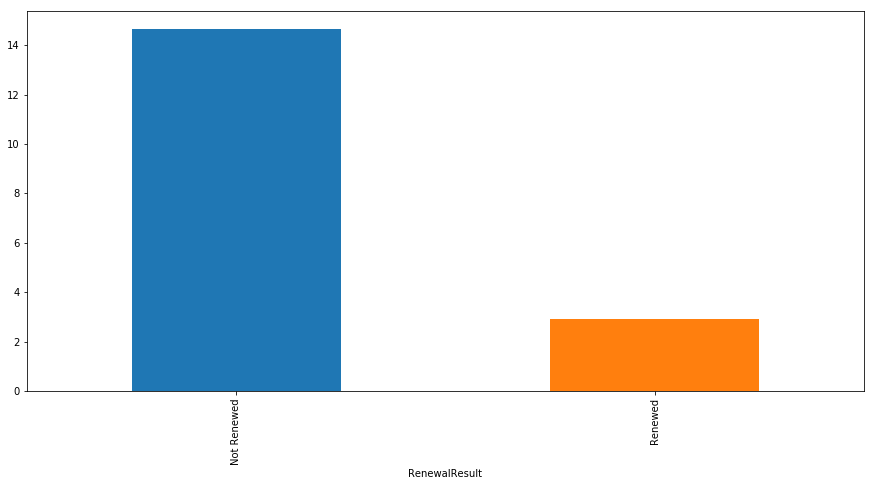

In [51]:
#yenileme yapmamaya karar verenlere eski fiyata göre ortalama %14 daha fazla fiyat teklif edilmiş,bu oran yenileme yapanlarda
# %2
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['RenewalResult']).mean()['fiyat_degisimi'].plot(kind='bar',ax=ax)

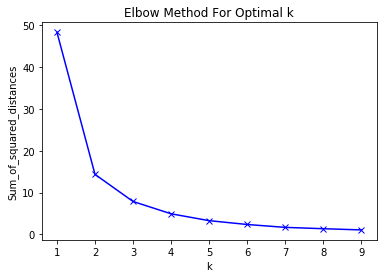

In [53]:
#eski fiyatlar bazında kümeleme yapalım
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#yukarda oluşturduğum dataset i kullanıcam
#To give equal importance to all features, we need to scale the continuous features. 
#We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features
mms = MinMaxScaler()
reshaped = np.array(df.iloc[:,4]).reshape(-1, 1)
mms.fit(reshaped)
data_transformed = mms.transform(reshaped)
#For each k value, we will initialise k-means 
#and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [54]:
# 2 clusters are optimal graph says 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

kmeans = KMeans(n_clusters=2)
kmeans.fit(reshaped)
y_kmeans = kmeans.predict(reshaped)

#plt.scatter(xx.iloc[:, 2], xx.iloc[:, 3], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [55]:
print(pd.DataFrame(centers))

             0
0  1419.088643
1   761.042508


In [58]:
df['Cluster'] = y_kmeans

for i in range(len(df)):
    if df.iloc[i,7]==0:
        df.iloc[i,7]='High'
    elif df.iloc[i,7]==1:
        df.iloc[i,7]='Low'

In [59]:
df.head()

,RenewalResult,VehicleBrand,VehicleModelYear,VehiclePlateCityName,ExsistingPolicyGrossPremium,New Price,fiyat_degisimi,Cluster
0,Not Renewed,RENAULT (OYAK),2009,İSTANBUL,1087.064,1192.389,9.688942,Low
1,Not Renewed,RENAULT (OYAK),2011,İSTANBUL,603.900,751.245,24.398907,Low
2,Not Renewed,MERCEDES,2009,İSTANBUL,1514.986,1710.786,12.924212,High
3,Not Renewed,HYUNDAI,2005,İZMİR,682.099,942.865,38.229934,Low
4,Not Renewed,TOFAS-FIAT,2013,İSTANBUL,1413.456,1382.150,-2.214855,High


In [60]:
#kümeleme sonuçlarına göre en çok low segmennte müşterimiz var yani 500 -1000 lira arasında fiyat ödeyen kitleye daha çok hitap
#ediyoruz
#high segmentte rakamlar çok yüksek
df.groupby(['Cluster']).describe()['ExsistingPolicyGrossPremium']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High,719.0,1419.088643,282.512523,1090.078,1206.9585,1355.6400,1552.1715,3115.607
Low,2076.0,761.042508,139.469549,506.737,651.9095,739.9755,860.7445,1088.791


In [61]:
#bu segmentlere göre yenieleme durumlarına bakarsak low segmentinin yenileme performansının iyi olduğunu
#high segmentte yarı yarıya yenileme olduğunu görüyoruz
#ama yine de en çok low segmentte churn var.bu sayı olarak çokluktan kaynaklanabilir.
df.groupby(['Cluster','RenewalResult']).describe()['ExsistingPolicyGrossPremium']

count         mean         std       min        25%  \
Cluster RenewalResult                                                         
High    Not Renewed     342.0  1450.897684  284.433858  1090.540  1227.9190   
        Renewed         377.0  1390.232695  277.997297  1090.078  1197.7130   
Low     Not Renewed     699.0   775.287192  145.205904   506.737   663.0745   
        Renewed        1377.0   753.811547  135.948967   516.241   647.8120   

                            50%         75%       max  
Cluster RenewalResult                                  
High    Not Renewed    1400.707  1601.94375  2766.742  
        Renewed        1312.542  1509.78300  3115.607  
Low     Not Renewed     761.266   878.80650  1088.791  
        Renewed         733.172   849.47500  1087.900

In [62]:
#high segmentinde yüksek indirim ile müşteriyi elde tutarken
#low segmentinde %22 ve üzeri ücret artışı churn e sebep olmaktadır.ortalama %6 ücret artışı low segment için kabul edileblirdir
df.groupby(['Cluster','RenewalResult']).mean()['fiyat_degisimi']

Cluster  RenewalResult
High     Not Renewed      -2.219563
         Renewed         -11.184292
Low      Not Renewed      22.922241
         Renewed           6.770988
Name: fiyat_degisimi, dtype: float64

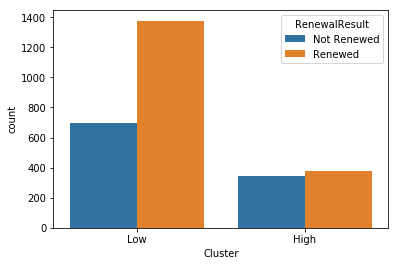

In [63]:
import seaborn as sns
yy =df[['RenewalResult','Cluster']]
ax = sns.countplot(x="Cluster" ,hue="RenewalResult", data=yy)

In [64]:
#en çok churn ü olan 4 modele bakalım.
#churnler en çok low segmentinde toplanmış ki bu segmentin churn sayısı toplam churn un yarısından fazla
#bu 4 modelin churn oranı da bu segmentin %70 ine tekabül ediyor.
#en çok churn eden araba gruplarını alalım
vehicles =['RENAULT (OYAK)','VOLKSWAGEN','OPEL','FORD']
df2 = df[['Cluster','VehicleBrand','RenewalResult','ExsistingPolicyGrossPremium']] 
analysis_list=[]
for i in vehicles:
    analysis_list.append(df2[(df2['VehicleBrand'] == i)].groupby(['Cluster','VehicleBrand','RenewalResult']).agg(['mean', 'count']))
    

In [65]:
analysis_list
#segmentler ve iptallere göre baktığımızda ödenen mevcut policeler arasında bir fark gözükmemektedir.

[                                     ExsistingPolicyGrossPremium      
                                                             mean count
 Cluster VehicleBrand   RenewalResult                                  
 High    RENAULT (OYAK) Not Renewed                   1423.746383    47
                        Renewed                       1436.456052    58
 Low     RENAULT (OYAK) Not Renewed                    758.277229   109
                        Renewed                        746.143881   168,
                                    ExsistingPolicyGrossPremium      
                                                           mean count
 Cluster VehicleBrand RenewalResult                                  
 High    VOLKSWAGEN   Not Renewed                   1462.599548    42
                      Renewed                       1428.803895    57
 Low     VOLKSWAGEN   Not Renewed                    816.784571    77
                      Renewed                        777.444855   159,
    

In [68]:
# en çok low segmentte churn var aynı model arabalar için bu segmente yoğunlaşalım
df3 = df[['Cluster','VehicleBrand','RenewalResult','ExsistingPolicyGrossPremium','fiyat_degisimi']] 

result=[]
for i in vehicles:
       result.append(df3[(df3['VehicleBrand'] == i) & (df3['Cluster'] == 'Low')].groupby(['VehicleBrand','RenewalResult']).
                  mean()[['ExsistingPolicyGrossPremium','fiyat_degisimi']])

In [69]:
#görüldüğü gibi bu segmentte mevcut poliçede ödenen fiyatlar arasında fark olmamasına rağmen  müşterilere yüksek oranda
#fiyat artışının yapılması churn u direk etkilemiştir.neden bir anda bu kadar yüksek fiyat teklifinin verildiği
#araştırılmaldıır.kazalı araçlarla daha mı çok çalışıyoruz?araç kiralama şirketleriyle daha çok mu çalışıyoruz ?
#upsell yapılacak kitle yanlış seçilmiş olabilir.
#eğer bu segmentte fiyat artışı yapılmak isteniyorsa daha önce bahsedildiği gibi %6-7 uygundur.
result

[                              ExsistingPolicyGrossPremium  fiyat_degisimi
 VehicleBrand   RenewalResult                                             
 RENAULT (OYAK) Not Renewed                     758.277229       29.231308
                Renewed                         746.143881        9.137780,
                             ExsistingPolicyGrossPremium  fiyat_degisimi
 VehicleBrand RenewalResult                                             
 VOLKSWAGEN   Not Renewed                     816.784571       23.990378
              Renewed                         777.444855        7.908491,
                             ExsistingPolicyGrossPremium  fiyat_degisimi
 VehicleBrand RenewalResult                                             
 OPEL         Not Renewed                     736.464667       27.039924
              Renewed                         722.215784        7.958787,
                             ExsistingPolicyGrossPremium  fiyat_degisimi
 VehicleBrand RenewalResult             

In [ ]:
#sonuc :
#özetle daha çok 500-1000 lira ücret ödeyen bir kitleye hitap ediyoruz.Bu kitle karşımıza low segment olarak çıkıyor.
#Bu segmentte yapılan yüksek ücret artışları (%25 ve üstü) direk churnü etkiliyor.
#high segmenti daha balanced giden bir segment.yarı yarıya yenileme görülüyor.
#high segmentinde müşteriyi elde tutmak için %15 lere varan indirim yapılması gerekilebilir.
#genel yenileme / yenilememe durumlarına bakarak %2 lik bir fiyat artışı makul görülebilir.en azından müşteriyi elde tutmak açısından
#faydalı olacaktır.low segmenti için ortalama %7 artış kabul edilebilir bir kampanyadır
#eğer araç kiralama şirketleriyle yoğun olarak çalışlıyorsa ki bana öyle geldi poliçelerdeki fiyat dengesizliği buna ve kazalara
#bağlı olabilir
#2017-2018 yılı modeli araçlar olarak portföymüz zayıf low segmentine göre uygun kampanyalarla müşteri kazanımına gidilebilinir.
#kampanya teklifim high segmente %15 indirim ve low segmentin en çok ücret ödeyen %10 luk kesimine %8 lik bir artış teklif 
#edilip orta sınıf bir segment yaratılması.